In [5]:
%matplotlib inline
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from numpy import angle, real
from numpy import exp, abs, pi, sqrt
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage as ndimage

def imshow(im, cmap='gray'):
    # clip image from 0-1
    im = np.clip(im, 0, 1)
    plt.imshow(im, cmap=cmap)


In [6]:
! curl https://6.869.csail.mit.edu/sp21/pset3_data/bill.avi > bill.avi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  6  678k    6 43144    0     0  30085      0  0:00:23  0:00:01  0:00:22 30212
 75  678k   75  509k    0     0   209k      0  0:00:03  0:00:02  0:00:01  209k
 77  678k   77  522k    0     0   151k      0  0:00:04  0:00:03  0:00:01  152k
 82  678k   82  559k    0     0   109k      0  0:00:06  0:00:05  0:00:01  109k
100  678k  100  678k    0     0   128k      0  0:00:05  0:00:05 --:--:--  140k


## Problem 1.a

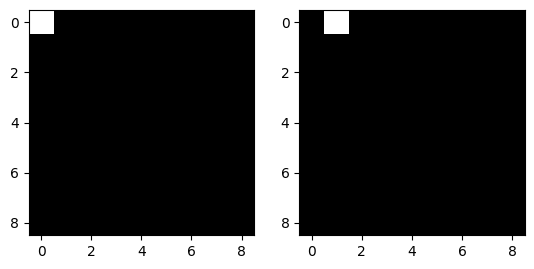

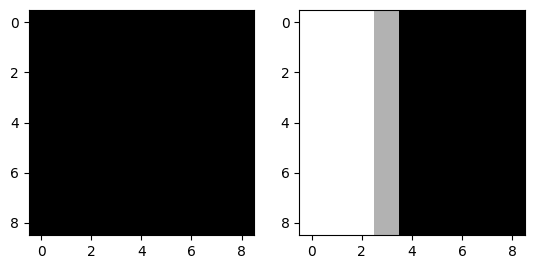

In [8]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4;

# horizontal movement from (0, 0) to (0, 1)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1

ff1 = fftshift(fft2(im1))
ff2 = fftshift(fft2(im2))

plt.figure()
plt.subplot(121)
imshow(im1)
plt.subplot(122)
imshow(im2)

plt.figure()
plt.subplot(121)
imshow(angle(ff1))
plt.subplot(122)
imshow(angle(ff2))

### Magnify Change


In [10]:
def magnifyChange(im1, im2, magnificationFactor):

    # find phase shift in frequency domain
    im1Dft = fft2(im1)
    im2Dft = fft2(im2)
    phaseShift = angle(im2Dft) - angle(im1Dft)

    # magnify the phase change in frequency domain
    magnifiedPhaseShift = np.angle(im1Dft) + magnificationFactor * phaseShift
    magnitude = abs(im1Dft)
    magnifiedDft = magnitude * exp(1j * magnifiedPhaseShift)

    # what does the magnified phase change cause in image space?
    magnified = ifft2(magnifiedDft).real;

    return magnified

**HINT:** If you're not familiar with complex number in python, here's a quickstart.

## Problem 1.b

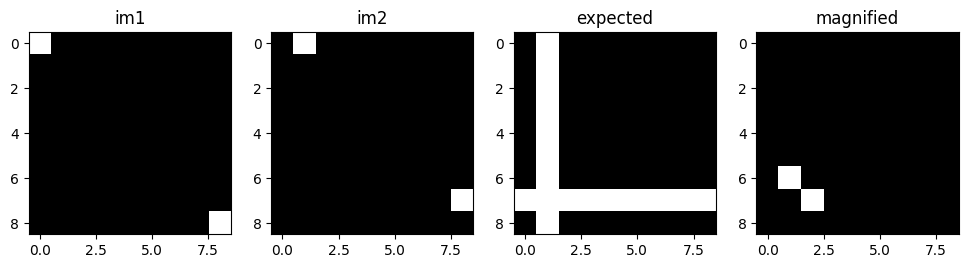

In [13]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# horizontal movement from (1, 1) to (1, 2)
# additional vertical movement from (9, 9) to (8, 9)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1


### TODO: ENTER YOUR CODE BELOW
### manually edit the expected matrix (currently set as zeros) by creating 1s to show the expected output
expected = np.zeros([imSize, imSize])
expected[:, 1] = 1
expected[7, :] = 1


# magnify position change
magnified = magnifyChange(im1, im2, magnificationFactor)


plt.figure(figsize=(12,36))
plt.subplot(141)
imshow(im1); plt.title('im1');

plt.subplot(142)
imshow(im2); plt.title('im2');

plt.subplot(143)
imshow(expected); plt.title('expected');

plt.subplot(144)
imshow(magnified); plt.title('magnified');
plt.savefig("problem_3b.png", bbox_inches="tight")

## Problem 1.c

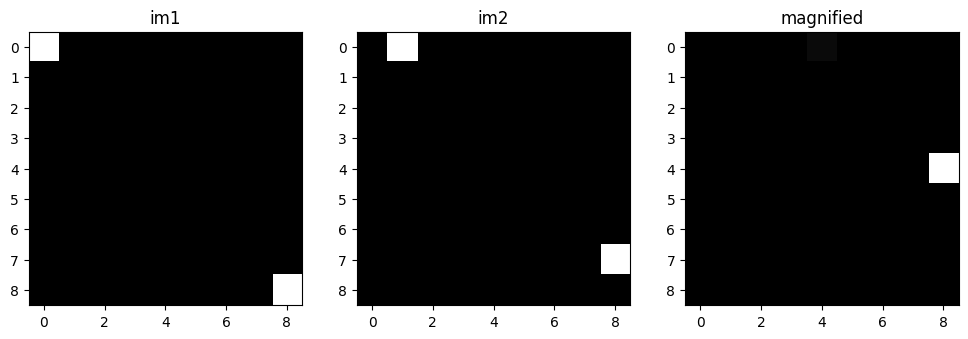

In [15]:
# 9x9 images
imSize = 9

# we would like to magnify the change between im1 and im2 by 4x
magnificationFactor = 4

# width of our Gaussian window
sigma = 2

# horizontal movement from (1, 1) to (1, 2)
# additional vertical movement from (9, 9) to (8, 9)
im1 = np.zeros([imSize, imSize])
im2 = np.zeros([imSize, imSize])
im1[0,0] = 1
im2[0,1] = 1
im1[8,8] = 1
im2[7,8] = 1

# we will magnify windows of the image and aggregate the results
magnified = np.zeros([imSize, imSize])

# meshgrid for computing Gaussian window
X, Y = np.meshgrid(np.arange(imSize), np.arange(imSize))

for y in range(0, imSize, 2*sigma):
    for x in range(0, imSize, 2*sigma):
        gaussianMask = exp(-((X - x - sigma)**2 + (Y - y - sigma)**2) / (2 * sigma**2))
        gaussianMask /= gaussianMask.sum()  #Normalizing
        im1_window = im1 * gaussianMask
        im2_window = im2 * gaussianMask
        windowMagnified = magnifyChange(im1_window, im2_window, magnificationFactor)
        magnified = magnified + windowMagnified

plt.figure(figsize=(12,36))
plt.subplot(131)
imshow(im1); plt.title('im1');

plt.subplot(132)
imshow(im2); plt.title('im2');

plt.subplot(133)
imshow(magnified); plt.title('magnified');
plt.savefig("problem_3c.png", bbox_inches="tight")

## Problem 1.d

In [17]:
import numpy as np
import cv2

cap = cv2.VideoCapture('bill.avi')

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()

    if ret is False:
        break

    frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

frames size: (60, 240, 240, 3) # (nb_frames, height, width, channel)


### Motion magnification
Fill out code **here**

In [19]:

# Parameters
magnificationFactor = 10
sigma = 13
alpha = 0.5

# Initialize
magnified = np.zeros_like(frames)

# Create Gaussian window
def gaussian_window(width, height, sigma):
    x = np.linspace(-width//2, width//2, width)
    y = np.linspace(-height//2, height//2, height)
    X, Y = np.meshgrid(x, y)
    gauss = exp(-(X**2 + Y**2) / (2 * sigma**2))
    return gauss / gauss.sum()

gaussianMask = gaussian_window(2*sigma, 2*sigma, sigma)

# Check dimensions
assert frames.shape[1] >= 2*sigma and frames.shape[2] >= 2*sigma, "Frame dimensions are smaller than window size."

# Iterate over frames and windows
xRange = list(range(0, frames.shape[2] - 2*sigma + 1, 2*sigma))
yRange = list(range(0, frames.shape[1] - 2*sigma + 1, 2*sigma))
numWindows = len(xRange) * len(yRange)
windowIndex = 1

for y in yRange:
    for x in xRange:
        for channelIndex in range(3):  # RGB channels
            for frameIndex in range(frames.shape[0]):
                # Create windowed frames
                windowedFrames = frames[frameIndex, y:y+2*sigma, x:x+2*sigma, channelIndex]
                windowedFrames = windowedFrames * gaussianMask

                # Initialize moving average of phase
                if frameIndex == 0:
                    windowAveragePhase = angle(fft2(windowedFrames))

                windowDft = fft2(windowedFrames)

                # Compute phase shift
                windowPhaseShift = angle(windowDft) - windowAveragePhase
                windowPhaseShift[windowPhaseShift > np.pi] -= 2 * np.pi
                windowPhaseShift[windowPhaseShift < -np.pi] += 2 * np.pi

                # Magnify phase shift
                windowMagnifiedPhase = magnificationFactor * windowPhaseShift

                # Convert back to image space
                def phase_to_dft(magnifiedPhase, originalDft):
                    magnitude = np.abs(originalDft)
                    phase = np.angle(originalDft) + magnifiedPhase
                    return magnitude * np.exp(1j * phase)

                windowMagnifiedDft = phase_to_dft(windowMagnifiedPhase, windowDft)
                windowMagnified = np.clip(abs(ifft2(windowMagnifiedDft)), 0, 255)

                # Update moving average
                windowPhaseUnwrapped = windowAveragePhase + windowPhaseShift
                windowAveragePhase = alpha * windowAveragePhase + (1 - alpha) * windowPhaseUnwrapped

                # Aggregate results
                magnified[frameIndex, y:y+2*sigma, x:x+2*sigma, channelIndex] += windowMagnified

        # Print progress
        print('{}/{}'.format(windowIndex, numWindows), end='\r')
        windowIndex += 1


In [20]:
outputs = magnified / np.max(magnified)
for channelIndex in range(3):
    originalFrame = frames[0,:,:,channelIndex]
    magnifiedFrame = outputs[0,:,:,channelIndex]
    scale = np.std(originalFrame[:]) / np.std(magnifiedFrame[:])
    originalMean = np.mean(originalFrame[:])
    magnifiedMean = np.mean(magnifiedFrame[:])
    outputs[:,:,:,channelIndex] = magnifiedMean + scale * (outputs[:,:,:,channelIndex] - magnifiedMean)

outputs = np.clip(outputs, 0, 1)

In [21]:
# create output video
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('bill_magnified.avi',fourcc, 30.0, (height, width))

for i in range(frames.shape[0]):
    # scale the frame back to 0-255
    frame = (np.clip(outputs[i], 0, 1) * 255).astype(np.uint8)

    # write frame to output video
    out.write(frame)

out.release()

In [22]:
# Only for colab downloading videos
try:
    from google.colab import files
    files.download('bill_magnified.avi')
except:
    print("Only for google colab")

Only for google colab


# Problem 2: Eulerian Motion Magnification 

Let's start by reading all the frames of the video.

In [25]:
import numpy as np
import cv2
import scipy.signal as signal
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt

#! curl http://people.csail.mit.edu/mrub/evm/video/baby.mp4 > baby.mp4

cap = cv2.VideoCapture('baby.mp4')
fps = int(cap.get(cv2.CAP_PROP_FPS))

# list of video frames
frames = []

while(cap.isOpened()):
    # read frame from the video
    ret, frame = cap.read()

    if ret is False:
        break
    frame = cv2.resize(frame, (424, 240))
    frame = frame[:, 80:80+240]
    frames.append(frame)

cap.release()

# scale frame to 0-1
frames = np.array(frames) / 255.
print("frames size:", frames.shape, "# (nb_frames, height, width, channel)")

# get height, width
numFrames = frames.shape[0]
height = frames.shape[1]
width = frames.shape[2]

# Helper function for displaying the pyramid
def intensity_scale(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))
    
#def display_pyramid(pyramid):
 # N = len(pyramid)
  #for lvl in range(len(pyramid)):
   # plt.subplot(1, N, lvl+1)
    #imshow(intensity_scale(pyramid[lvl][0, ..., ::-1]))

def display_pyramid(pyramid):
    """
    Display the Gaussian pyramid for a single frame.

    Parameters:
    pyramid (List[np.array]): Gaussian pyramid levels for a frame.
    """
    num_levels = len(pyramid)
    
    plt.figure(figsize=(15, 5))
    for lvl in range(num_levels):
        plt.subplot(1, num_levels, lvl + 1)
        im = pyramid[lvl][0]  # Take the first frame for demonstration
        imshow(intensity_scale(im[:, :, ::-1]))


frames size: (301, 240, 240, 3) # (nb_frames, height, width, channel)


# Problem 2a: Gaussian pyramid
We will first write a function to create a gaussian pyramid of the input frames. The function takes in an array of N frames (N, H, W, 3) and outputs a list of frames (num_levels, N, H, W, 3) such that each entry corresponds to the gaussian pyramid starting from the finest to the coarest level.



In [27]:
import cv2
import numpy as np

def create_gaussian_pyramid(video_frames, num_levels=4):
    """
    Create a Gaussian pyramid from a video of frames.

    Parameters:
    video_frames (np.array): Input video frames with shape (num_frames, height, width, channels).
    num_levels (int): Number of levels in the pyramid.

    Returns:
    np.array: Gaussian pyramid with shape (num_frames, num_levels, H, W, 3).
    """
    num_frames = video_frames.shape[0]
    height = video_frames.shape[1]
    width = video_frames.shape[2]
    channels = video_frames.shape[3]

    # Initialize pyramid list
    gaussian_pyramid = []

    for frame_idx in range(num_frames):
        frame = video_frames[frame_idx]
        frame_pyramid = [frame]
        
        current_frame = frame
        
        # Create the Gaussian pyramid for the current frame
        for _ in range(num_levels - 1):
            # Downsample the current frame
            current_frame = cv2.pyrDown(current_frame)
            frame_pyramid.append(current_frame)

        # Append the pyramid levels for the current frame
        gaussian_pyramid.append(frame_pyramid)
    
    # Convert to numpy array for consistent shape
    gaussian_pyramid = np.array(gaussian_pyramid, dtype=object)
    
    return gaussian_pyramid



In [28]:
gaussian_pyramid = create_gaussian_pyramid(frames)

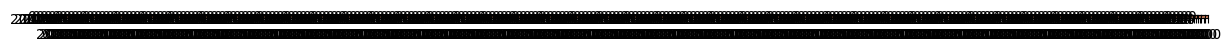

In [29]:
display_pyramid(gaussian_pyramid)
plt.savefig("gaussian_pyramid.png", bbox_inches="tight")

# Problem 2b: Laplacian pyramid
Now let's make the Laplacian pyramid using the gaussian pyramids you produced in 1a. Check that the returned frames take the form of (num_levels - 1, N, H, W, 3) [*sanity check: why?*]


In [31]:
#def create_laplacian_pyramid(gaussian_pyramid):
  ### TODO: ENTER YOUR CODE BELOW
  ### use the gaussian pyramid to create the laplacian pyramid for the video.
  ### You might find cv2.pyrUp function useful.

 # return [] # returning empty list for now. Change this!
#import cv2
#import numpy as np

def create_laplacian_pyramid(gaussian_pyramid):
    """
    Create a Laplacian pyramid from a Gaussian pyramid.

    Parameters:
    gaussian_pyramid (List[List[np.array]]): Gaussian pyramid levels for each frame.

    Returns:
    List[List[np.array]]: Laplacian pyramid with shape (num_levels - 1, N, H, W, 3).
    """
    num_frames = len(gaussian_pyramid)
    num_levels = len(gaussian_pyramid[0])

    laplacian_pyramid = []

    for frame_idx in range(num_frames):
        frame_laplacian = []
        
        for lvl in range(num_levels - 1):
            # Current level of Gaussian pyramid
            current_gaussian = gaussian_pyramid[frame_idx][lvl]
            # Upsample the next level
            next_gaussian_upsampled = cv2.pyrUp(gaussian_pyramid[frame_idx][lvl + 1], dstsize=(current_gaussian.shape[1], current_gaussian.shape[0]))
            # Compute the Laplacian (high-pass filter)
            laplacian = cv2.subtract(current_gaussian, next_gaussian_upsampled)
            frame_laplacian.append(laplacian)
        
        # Add the last level of the Gaussian pyramid (which doesn't have a Laplacian equivalent)
        frame_laplacian.append(gaussian_pyramid[frame_idx][-1])

        # Store Laplacian pyramid for the current frame
        laplacian_pyramid.append(frame_laplacian)

    return laplacian_pyramid


In [32]:
laplacian_pyramid = create_laplacian_pyramid(gaussian_pyramid)

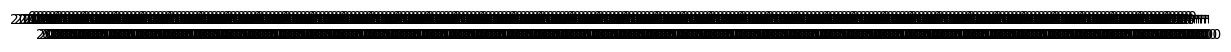

In [33]:
display_pyramid(laplacian_pyramid)
plt.savefig("laplacian_pyramid.png", bbox_inches="tight")

# Problem 2c: Butter bandpass filter temporally

In [35]:

def butter_bandpass_filter(laplace_video, low_freq, high_freq, fs, filter_order=5):
    """
    Apply a Butterworth bandpass filter to the Laplacian pyramid video data.

    Parameters:
    laplace_video (np.array): Input Laplacian pyramid video data.
    low_freq (float): Low cutoff frequency for the bandpass filter.
    high_freq (float): High cutoff frequency for the bandpass filter.
    fs (float): Sampling frequency of the video.
    filter_order (int): Order of the Butterworth filter.

    Returns:
    np.array: Filtered Laplacian pyramid video data.
    """
    omega = 0.5 * fs
    low = low_freq / omega
    high = high_freq / omega

    # Create a Butterworth bandpass filter
    b, a = signal.butter(filter_order, [low, high], btype='band')

    # Apply the filter to the Laplacian video data
    y = signal.lfilter(b, a, laplace_video, axis=0)

    return y

# Problem 2d: Combining the amplified filtered signal to get the magnified video

In [37]:
### TODO: ENTER YOUR CODE BELOW
### Combine all the bandpassed filtered signals to one matrix which is the same
### dimensions as the input video.
### Hint: start from the lowest resolution of the amplified filtered signal,
### upsample that using cv2.pyrUp and add it to the amplified filtered signal
### at the next higher resolution.

### The output video, 'euler_magnified_video', will be the
### input video frames + combined magnified signal.
def reconstruct_video_from_laplacian(laplacian_pyramid):
 
    num_frames = len(laplacian_pyramid)
    num_levels = len(laplacian_pyramid[0])

    reconstructed_video = []

    for frame_idx in range(num_frames):
        # Start from the lowest level of the pyramid
        current_reconstruction = laplacian_pyramid[frame_idx][-1]

        # Iterate from the second-last level to the top
        for lvl in range(num_levels - 2, -1, -1):
            # Upsample the current reconstruction
            upsampled = cv2.pyrUp(current_reconstruction, dstsize=(laplacian_pyramid[frame_idx][lvl].shape[1], laplacian_pyramid[frame_idx][lvl].shape[0]))
            
            # Add the upsampled image to the current Laplacian level
            current_reconstruction = cv2.add(upsampled, laplacian_pyramid[frame_idx][lvl])

        # Store the reconstructed frame
        reconstructed_video.append(current_reconstruction)

    return np.array(reconstructed_video)
bandpass_filtered = []
low_freq = 0.4
high_freq = 3
amplification_factor = 20

for i in range(len(laplacian_pyramid)):
    filtered = []
    for level in laplacian_pyramid[i]:
        filtered_level = butter_bandpass_filter(level, low_freq, high_freq, fps)
        filtered_level *= amplification_factor  # Amplify the filtered signal
        filtered.append(filtered_level)
    bandpass_filtered.append(filtered)
euler_magnified_video = reconstruct_video_from_laplacian(bandpass_filtered)

# Adding magnified signal to original frames and ensuring valid range
euler_magnified_video = frames + euler_magnified_video
euler_magnified_video = np.clip(euler_magnified_video, 0, 1)

In [38]:
### Note:
### The output video will likely flicker and show severe magnification artifacts
### for about 4 seconds before showing a noisy magnified video.
### The initial artifacts should be ignored.

# create output video
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('baby_euler_magnification.avi', fourcc, 30.0, (height, width))

for i in range(frames.shape[0]):
    # scale the frame back to 0-255
    frame = (np.clip(euler_magnified_video[i], 0, 1) * 255).astype(np.uint8)

    # write frame to output video
    out.write(frame)

out.release()